In [2]:
# Importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
df_US = df[df['job_country'] == 'United States'].copy()
# It will have a different ID, but it is good practice to add ".copy()" at the end

In [4]:
id(df_US) == id(df)

False

In [5]:
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')
df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None,October
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",July
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}",April
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,January


In [8]:
df_US_pivot = df_US.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


In [ ]:
df_US_pivot.reset_index(inplace=True)
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B')
df_US_pivot
df_US_pivot.loc[:,['job_title_short','job_posted_month','month_no']]

job_title_short,level_0,index,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
0,0,0,April,565,40,6049,2801,4867,51,1025,781,991,112,1900-04-01
1,1,1,August,903,39,6634,3269,6318,68,1186,903,1515,194,1900-08-01
2,2,2,December,648,40,3979,2641,3472,119,601,689,752,212,1900-12-01
3,3,3,February,447,24,6124,3060,4956,56,1258,878,1127,90,1900-02-01
4,4,4,January,527,36,8494,2655,6915,60,1544,773,1552,114,1900-01-01
5,5,5,July,581,39,5201,2570,4876,65,883,747,1095,153,1900-07-01
6,6,6,June,446,32,5683,2893,4645,48,1009,812,1033,93,1900-06-01
7,7,7,March,438,19,6218,3183,4779,59,1114,829,1150,115,1900-03-01
8,8,8,May,279,20,4993,2976,4377,49,839,746,914,90,1900-05-01
9,9,9,November,719,36,4531,2793,4175,132,656,684,816,194,1900-11-01


In [13]:
df_US_pivot.drop('level_0', axis=1)

job_title_short,index,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
0,0,April,565,40,6049,2801,4867,51,1025,781,991,112,1900-04-01
1,1,August,903,39,6634,3269,6318,68,1186,903,1515,194,1900-08-01
2,2,December,648,40,3979,2641,3472,119,601,689,752,212,1900-12-01
3,3,February,447,24,6124,3060,4956,56,1258,878,1127,90,1900-02-01
4,4,January,527,36,8494,2655,6915,60,1544,773,1552,114,1900-01-01
5,5,July,581,39,5201,2570,4876,65,883,747,1095,153,1900-07-01
6,6,June,446,32,5683,2893,4645,48,1009,812,1033,93,1900-06-01
7,7,March,438,19,6218,3183,4779,59,1114,829,1150,115,1900-03-01
8,8,May,279,20,4993,2976,4377,49,839,746,914,90,1900-05-01
9,9,November,719,36,4531,2793,4175,132,656,684,816,194,1900-11-01


In [15]:
df_US_pivot.loc[:,['index','job_posted_month','month_no']]

job_title_short,index,job_posted_month,month_no
0,0,April,1900-04-01
1,1,August,1900-08-01
2,2,December,1900-12-01
3,3,February,1900-02-01
4,4,January,1900-01-01
5,5,July,1900-07-01
6,6,June,1900-06-01
7,7,March,1900-03-01
8,8,May,1900-05-01
9,9,November,1900-11-01


In [16]:
df_US_pivot['month_no'] = df_US_pivot['month_no'].dt.month

In [17]:
df_US_pivot.loc[:,['job_posted_month','month_no']]

job_title_short,job_posted_month,month_no
0,April,4
1,August,8
2,December,12
3,February,2
4,January,1
5,July,7
6,June,6
7,March,3
8,May,5
9,November,11


In [19]:
df_US_pivot.drop(['level_0','index'], axis=1)

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
0,April,565,40,6049,2801,4867,51,1025,781,991,112,4
1,August,903,39,6634,3269,6318,68,1186,903,1515,194,8
2,December,648,40,3979,2641,3472,119,601,689,752,212,12
3,February,447,24,6124,3060,4956,56,1258,878,1127,90,2
4,January,527,36,8494,2655,6915,60,1544,773,1552,114,1
5,July,581,39,5201,2570,4876,65,883,747,1095,153,7
6,June,446,32,5683,2893,4645,48,1009,812,1033,93,6
7,March,438,19,6218,3183,4779,59,1114,829,1150,115,3
8,May,279,20,4993,2976,4377,49,839,746,914,90,5
9,November,719,36,4531,2793,4175,132,656,684,816,194,11


In [ ]:
df_US_pivot.sort_values(by = 'month_no', inplace = True)
df_US_pivot.set_index('job_posted_month')

job_title_short,level_0,index,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
job_posted_month,,,,,,,,,,,,,
January,4,4,527,36,8494,2655,6915,60,1544,773,1552,114,1
February,3,3,447,24,6124,3060,4956,56,1258,878,1127,90,2
March,7,7,438,19,6218,3183,4779,59,1114,829,1150,115,3
April,0,0,565,40,6049,2801,4867,51,1025,781,991,112,4
May,8,8,279,20,4993,2976,4377,49,839,746,914,90,5
June,6,6,446,32,5683,2893,4645,48,1009,812,1033,93,6
July,5,5,581,39,5201,2570,4876,65,883,747,1095,153,7
August,1,1,903,39,6634,3269,6318,68,1186,903,1515,194,8
September,11,11,897,50,4639,3224,4568,113,805,775,1014,228,9


In [22]:
df_US_pivot = df_US_pivot.drop(['level_0','index'], axis=1)
df_US_pivot.set_index('job_posted_month', inplace = True)

In [24]:
df_US_pivot = df_US_pivot.drop(columns='month_no')
df_US_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


<Axes: xlabel='job_posted_month'>

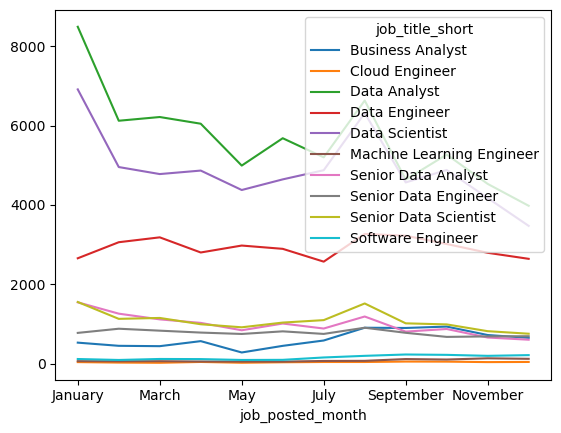

In [25]:
df_US_pivot.plot(kind='line')

In [26]:
top_3 = df_US['job_title_short'].value_counts().head(3)

In [27]:
top_3

job_title_short
Data Analyst      67816
Data Scientist    58830
Data Engineer     35080
Name: count, dtype: int64

In [35]:
top_3 = top_3.index.tolist()

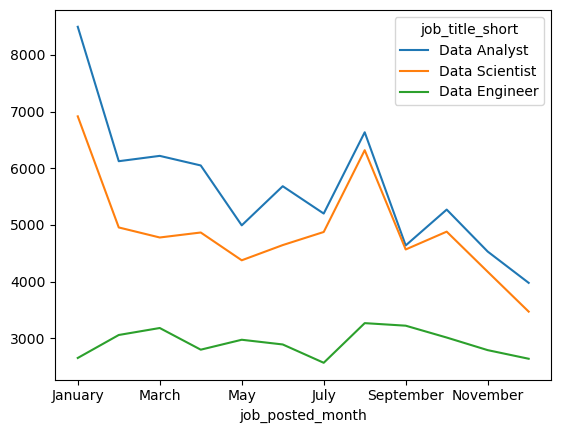

In [36]:
df_US_pivot[top_3].plot(kind='line')
plt.show()

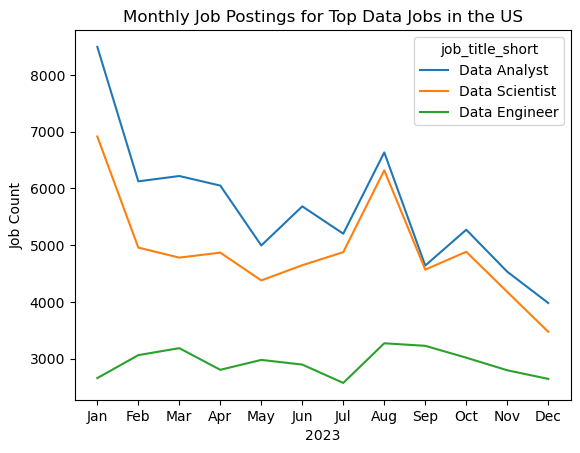

In [37]:
custom_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_US_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in the US')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.xticks(ticks=range(len(custom_labels)), labels=custom_labels)
plt.show()